<a href="https://colab.research.google.com/github/UtkarshAIITB/IPL-Data-Analysis/blob/main/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
new = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/new.csv')
# new.head()

In [54]:
t = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/t.csv')
# t.head()

In [55]:
t.drop(columns = ['Unnamed: 0'], inplace = True)
t.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,year,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,597998,2013-04-03,9,6,9,9,1,0.1,6,9,2013,1,0,0,128,0,1
1,597998,2013-04-03,9,6,9,9,1,0.2,6,9,2013,1,0,0,128,4,1
2,597998,2013-04-03,9,6,9,9,1,0.3,6,9,2013,1,0,0,128,5,1
3,597998,2013-04-03,9,6,9,9,1,0.4,6,9,2013,1,0,0,128,5,1
4,597998,2013-04-03,9,6,9,9,1,0.5,6,9,2013,1,0,0,128,5,1


In [56]:
new.drop(columns = ['Unnamed: 0'], inplace = True)

In [57]:
new.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,year,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,335982,2008-04-18,5,9,5,9,1,0.1,9,5,2008,1,0,0,222,1,0
1,335982,2008-04-18,5,9,5,9,1,0.2,9,5,2008,1,0,0,222,1,0
2,335982,2008-04-18,5,9,5,9,1,0.3,9,5,2008,1,0,0,222,2,0
3,335982,2008-04-18,5,9,5,9,1,0.4,9,5,2008,1,0,0,222,2,0
4,335982,2008-04-18,5,9,5,9,1,0.5,9,5,2008,1,0,0,222,2,0


In [58]:
# new is the training set and t is the test set

In [59]:
tnew = t.drop(t[(t.over <= 11.0) | (t.over >=16.0)].index)
tnew.reset_index(drop = True)
y1test = tnew['total_runs_y']
y2test = tnew['winner']
tnew.drop(columns = ['id', 'date', 'year', 'total_runs_y', 'winner'], inplace = True)
tnew.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,9,6,9,1,11.1,6,9,1,0,0,76,3
1,9,6,9,1,11.2,6,9,1,0,0,77,3
2,9,6,9,1,11.3,6,9,1,0,0,78,3
3,9,6,9,1,11.4,6,9,1,0,0,79,3
4,9,6,9,1,11.5,6,9,1,0,0,79,3


In [60]:
xnew = new.drop(new[(new.over <=11.0) | (new.over >=16.0)].index)
xnew.reset_index(drop = True)
y1train = xnew['total_runs_y']
y2train = xnew['winner']
xnew.drop(columns = ['id', 'date', 'year', 'total_runs_y', 'winner'], inplace = True)
xnew.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,5,9,5,1,11.1,9,5,1,0,0,102,1
1,5,9,5,1,11.2,9,5,1,0,0,108,1
2,5,9,5,1,11.3,9,5,1,0,0,110,1
3,5,9,5,1,11.4,9,5,1,0,0,111,1
4,5,9,5,1,11.5,9,5,1,0,0,111,1


In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [62]:
xnewt = sc.fit_transform(xnew) 
tnewt = sc.fit_transform(tnew)

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [64]:
model = Sequential()
# model.add(Dense(88, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(43, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(22, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(11, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [65]:
history= model.fit(x=xnewt, y=y1train, epochs=200, 
          validation_data=(tnewt,y1test))

Epoch 1/200
1370/1370 [==============================] - 3s 2ms/step - loss: 7090.9170 - val_loss: 1100.3158
Epoch 2/200
1370/1370 [==============================] - 3s 2ms/step - loss: 4093.0134 - val_loss: 590.1658
Epoch 3/200
1370/1370 [==============================] - 3s 2ms/step - loss: 3661.9888 - val_loss: 451.4974
Epoch 4/200
1370/1370 [==============================] - 3s 2ms/step - loss: 3354.6709 - val_loss: 438.1100
Epoch 5/200
1370/1370 [==============================] - 3s 2ms/step - loss: 3109.4094 - val_loss: 425.4501
Epoch 6/200
1370/1370 [==============================] - 3s 2ms/step - loss: 2973.0913 - val_loss: 384.2539
Epoch 7/200
1370/1370 [==============================] - 3s 2ms/step - loss: 2855.5974 - val_loss: 322.9146
Epoch 8/200
1370/1370 [==============================] - 3s 2ms/step - loss: 2725.3215 - val_loss: 394.4162
Epoch 9/200
1370/1370 [==============================] - 3s 2ms/step - loss: 2602.9827 - val_loss: 360.9225
Epoch 10/200
1370/1370 [===

In [66]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


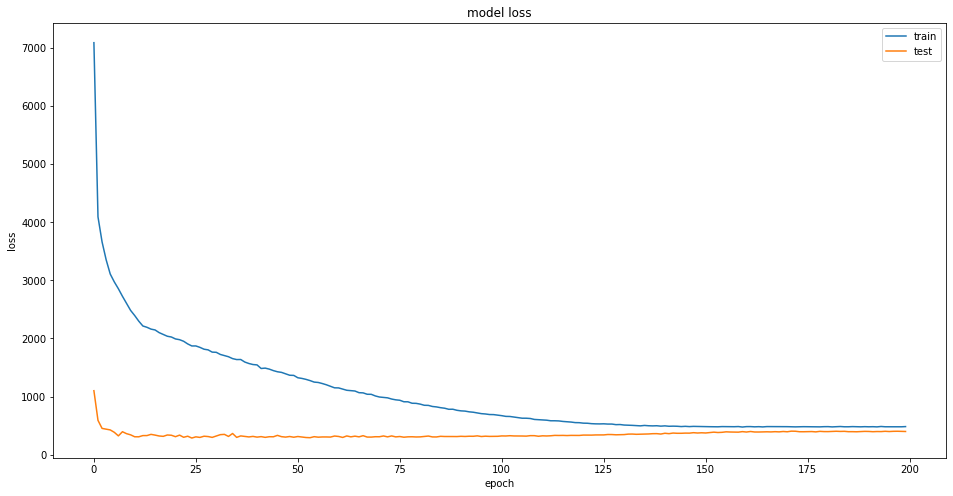

In [67]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [68]:
y1test = y1test.ravel()

In [69]:
predictions = model.predict(tnewt)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y1test
sample.head(10)

,Predict,Actual
0,158.849609,128
1,159.155792,128
2,159.461975,128
3,159.768173,128
4,159.049469,128
5,151.403915,128
6,151.253708,128
7,150.786285,128
8,150.343292,128
9,154.346481,128


In [70]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [71]:
custom_accuracy(sample['Actual'] , sample['Predict'],10)

40.27534965034965

In [72]:
# sample.to_csv('sample.csv')

In [73]:
# try1 = sample[sample.Actual == 128]
# try1.head()

In [74]:
# try1.shape[0]

In [75]:
# try1.sum()

In [76]:
# (try1.sum())/try1.shape[0]

In [77]:
# try2 = sample[sample.Actual == 129]
# (try2.sum())/try2.shape[0]

In [78]:
# try2 = sample[sample.Actual == 156]
# result = (try2.sum())/try2.shape[0]

In [79]:
# result

In [80]:
# res2 = result.values.reshape(1,2)

In [81]:
# res2

In [82]:
# res2.shape

In [83]:
# df.loc[len(df)] = your_array
# results.loc[len(results)] = res2
# df.append(pd.DataFrame(arr).T)
# results = results.append(pd.DataFrame(res2))
# results.append(pd.DataFrame(res3))

In [84]:
ar1 = sample['Actual'].unique()

In [85]:
results = pd.DataFrame()

In [86]:
for items in ar1:
  # print(items)
  try2 = sample[sample.Actual == items]
  result = (try2.sum())/try2.shape[0]
  # print(result)
  res = result.values.reshape(1,2)
  # print(res)
  results = results.append(pd.DataFrame(res))

In [87]:
results.head()

,0,1
0,149.010096,128.0
0,149.221979,129.0
0,152.137009,156.0
0,156.992090,154.0
0,146.530843,126.0


In [88]:
# rankings_pd.rename(columns = {'test':'TEST'}, inplace = True)
results.rename(columns = {0: 'Predict',
                          1: 'Actual'
                          }, inplace = True)

In [89]:
results.reset_index(drop = True)

,Predict,Actual
0,149.010096,128.0
1,149.221979,129.0
2,152.137009,156.0
3,156.992090,154.0
4,146.530843,126.0
...,...,...
79,194.112854,190.0
80,140.764160,113.0
81,164.106918,172.0
82,150.240397,134.0


In [90]:
results.tail()

,Predict,Actual
0,194.112854,190.0
0,140.764160,113.0
0,164.106918,172.0
0,150.240397,134.0
0,181.285091,192.0


In [91]:
print(custom_accuracy(results['Actual'].ravel(),results['Predict'].ravel(),12))

51.19047619047619


In [92]:
# results.info()

In [93]:
# results['Actual']

take epochs = 90 next time

In [94]:
tests = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/testset.csv')
# tests.head()
tests.drop(columns = ['Unnamed: 0'], inplace = True)
tests.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,1254058,2021-04-09,12,5,5,5,1,0.1,12,5,1,0,0,159,2,0
1,1254058,2021-04-09,12,5,5,5,1,0.2,12,5,1,0,0,159,2,0
2,1254058,2021-04-09,12,5,5,5,1,0.3,12,5,1,0,0,159,2,0
3,1254058,2021-04-09,12,5,5,5,1,0.4,12,5,1,0,0,159,4,0
4,1254058,2021-04-09,12,5,5,5,1,0.5,12,5,1,0,0,159,4,0


In [95]:
sets = tests.drop(tests[(tests.over <= 11.0) | (tests.over >=16.0)].index)
sets.reset_index(drop = True)
yt1 = sets['total_runs_y']
yt2 = sets['winner']
sets.drop(columns = ['id', 'date', 'total_runs_y', 'winner'], inplace = True)
sets.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,12,5,5,1,11.1,12,5,1,0,0,95,2
1,12,5,5,1,11.2,12,5,1,0,0,95,2
2,12,5,5,1,11.3,12,5,1,0,0,96,2
3,12,5,5,1,11.4,12,5,1,0,0,96,2
4,12,5,5,1,11.5,12,5,1,0,0,97,2


In [96]:
yt1 = yt1.ravel()

In [97]:
xs = sc.fit_transform(sets)

In [98]:
predictions = model.predict(xs)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=yt1
sample.head(10)

,Predict,Actual
0,172.097382,159
1,171.450775,159
2,171.653702,159
3,171.007080,159
4,171.210007,159
5,171.412933,159
6,169.066040,159
7,171.780945,159
8,171.983871,159
9,172.186798,159


In [99]:
ar1 = sample['Actual'].unique()
results = pd.DataFrame()
for items in ar1:
  # print(items)
  try2 = sample[sample.Actual == items]
  result = (try2.sum())/try2.shape[0]
  # print(result)
  res = result.values.reshape(1,2)
  # print(res)
  results = results.append(pd.DataFrame(res))

In [100]:
results.rename(columns = {0: 'Predict',
                          1: 'Actual'
                          }, inplace = True)
results.reset_index(drop = True)
print(custom_accuracy(results['Actual'].ravel(),results['Predict'].ravel(),12))

45.714285714285715
